In [43]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

# Component: Raw Data Source

## Step 1. Select
From a variety of Data sources, we had to decide which raw data to use that can fit our interest and choose one data set to explore about the content. Finally we chose the salary data for 2023, we can study a more recent trend about the labor market which helps us to understand our strength.

In [50]:
df = pd.read_csv('../data/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Step 2. Identify
Identify what types of data that we are using and its applicability. In our data, we have numbers, integers, decimals and texts which are arranged by different columns to assist us to have a more clear view of the data that we can use to answer the questions we originally defined.

- **Identitfy what types of data we are using**
- **Give a more clear view by filling more complete information**

In [51]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [52]:
employment_type = 'employment_type'
df[employment_type] = df[employment_type].replace('FT','Full-Time')
df[employment_type] = df[employment_type].replace('CT','Contract')
df[employment_type] = df[employment_type].replace('PT','Part-Time')
df[employment_type] = df[employment_type].replace('FL','Freelance')
df[employment_type].value_counts()

employment_type
Full-Time    3718
Part-Time      17
Contract       10
Freelance      10
Name: count, dtype: int64

In [53]:
experience_level = 'experience_level'
df[experience_level] = df[experience_level].replace('EN','Entry-level/Junior')
df[experience_level] = df[experience_level].replace('MI','Mid-level/Intermediate')
df[experience_level] = df[experience_level].replace('SE','Senior-level/Expert')
df[experience_level] = df[experience_level].replace('EX','Executive-level/Director')
df[experience_level].value_counts()

experience_level
Senior-level/Expert         2516
Mid-level/Intermediate       805
Entry-level/Junior           320
Executive-level/Director     114
Name: count, dtype: int64

## Step 3. Check 
Considering how to keep the data and its functions to use. We considered putting data in github to store our data in a structured way and easy to reach, to import and understand. 
- **We put the data on github for single source of truth and easy to access.**
- **Check the data of row is complete, and no null value.**

## Step 4. Access
Ensure the access of data and the sources suit the problem we defined at the first beginning. Here, when we were processing data, we were checking if the model can be run smoothly.
- **We can access the data smoothly and the data is in a good format to use.**

In [54]:
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [55]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Step 5. Extract
Pick up the relevant data to use and ensure the data can be accessed without problem.
* **We select the necessary columns to use and drop the columns that are not useful for our analysis.**

In [56]:
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-level/Expert,Full-Time,Data Scientist,412000,US,100,US,L
3751,2021,Mid-level/Intermediate,Full-Time,Principal Data Scientist,151000,US,100,US,L
3752,2020,Entry-level/Junior,Full-Time,Data Scientist,105000,US,100,US,S
3753,2020,Entry-level/Junior,Contract,Business Data Analyst,100000,US,100,US,L


# Use Case 1 - Average Salary based on Company Location

## Component: Explorative Data Analysis

### Step 6. Select
After extracting the most important data, we have already selected those that can be analyzed and to dive into different characteristics about the data, or our employment data to build preparation strategies or to make sure the validity of the result.
- **We selected the use case that we are interested in for use case 1.**
- **We output the necessary data, and saving to the github.**

In [ ]:
selected_columns = ['employee_residence', 'company_location', 'salary_in_usd']
uc1 = df[selected_columns]


# output data to csv for use case 1 
uc1.to_csv('../data/ds_salaries.csv', index=False)
uc1

,employee_residence,company_location,salary_in_usd
0,ES,ES,85847
1,US,US,30000
2,US,US,25500
3,CA,CA,175000
4,CA,CA,120000
...,...,...,...
3750,US,US,412000
3751,US,US,151000
3752,US,US,105000
3753,US,US,100000


### Step 7. Identity
To identify which kind of data that we can use also helps ourselves to prepare the data to be analyzed. After we choose the columns and data characteristics which fit to use for our problem to be solved or questions to be answered, we can prepare the analysis better than directly diving into it.

- **Access the data from Data Management, which is from github.**
- **We identify the country code by country_converter libaray.**
- **Printout the average salary by company location.**


In [ ]:
uc1 = pd.read_csv('../data/ds_salaries.csv')

In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
uc1['employee_residence'] = country
uc1['company_location'] = country
uc1['employee_residence'].value_counts()

employee_residence
USA    3004
GBR     167
CAN      85
ESP      80
IND      71
       ... 
BIH       1
ARM       1
CYP       1
KWT       1
MLT       1
Name: count, Length: 78, dtype: int64

## Data Preparation

### Step 8. Check 
When arranging the data, the requirement should be checked. 

**Requirement**
1. No null value. 
2. Data can be used. 

In [ ]:
uc1.isnull().sum()

employee_residence    0
company_location      0
salary_in_usd         0
dtype: int64

In [ ]:
uc1

,employee_residence,company_location,salary_in_usd
0,ESP,ESP,85847
1,USA,USA,30000
2,USA,USA,25500
3,CAN,CAN,175000
4,CAN,CAN,120000
...,...,...,...
3750,USA,USA,412000
3751,USA,USA,151000
3752,USA,USA,105000
3753,USA,USA,100000


# Use Case 14 

## Employ nationality by (can't find so use "average salary based on Company Location")

### Step 6.

In [ ]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()

### Step 7.

In [ ]:
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Average Salary by Company Location')
fig.show()

## Step 8.

In [ ]:
salary_location.isnull().sum()

# Use Case 15

## Salary based on work year

### Step 6.

Select the data we want to use.

In [ ]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]


### Step 7. Identify

In [ ]:
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])

year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

### Step 8. Check

In [ ]:

year_salary.isnull().sum()
#我自己加上去的，本身的code沒有寫，但是為了要check就自己加了一行，然後後面畫圖的部分好像跟678無關，是不是可以不用加入步驟當中？


2020    0
2021    0
2022    0
2023    0
dtype: int64

# Use Case 16

## Salary based on Experience

### Step 6

In [ ]:
exp_salary = df[['experience_level','salary_in_usd']]

### Step 7

In [ ]:
entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))
                            
fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()



### Step 8

In [ ]:
entry_salary.isnull().sum()

experience_level    0
salary_in_usd       0
dtype: int64

# Use Case 17

## Salary based on work year 

### Step 6

In [ ]:
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]


### Step 7

In [ ]:
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()

### Step 8

In [ ]:
year_salary.isnull().sum()

2020    0
2021    0
2022    0
2023    0
dtype: int64

# Use Case 18 

## Salary based on Company Size

### Step 6

In [ ]:
company_size = df[['company_size','salary_in_usd']]

### Step 7

In [ ]:
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

### Step 8

In [ ]:
company_size.isnull().sum()

company_size     0
salary_in_usd    0
dtype: int64

# Use Case 19

## Highest salaries based on Designation

### Step 6

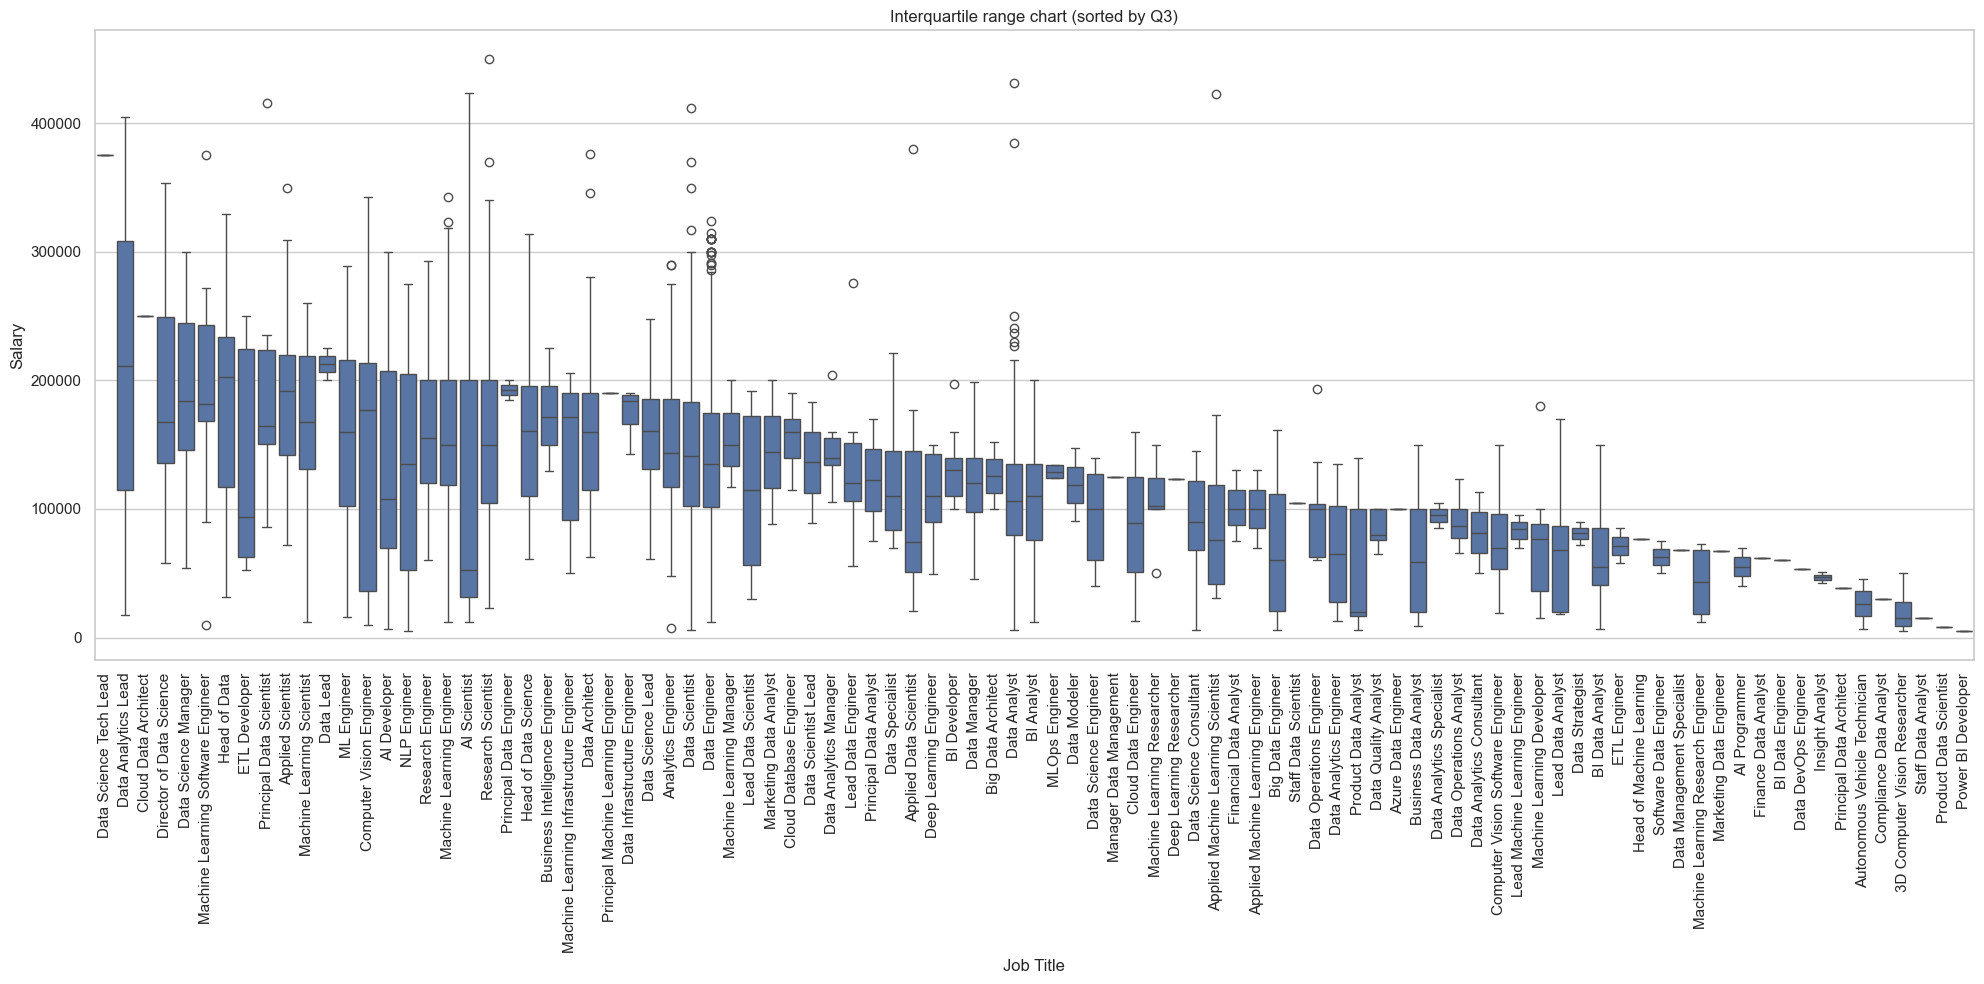

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个职位的第三四分位数并排序
q3_salaries = df.groupby('job_title')['salary_in_usd'].quantile(0.75).reset_index()
top_25_q3 = q3_salaries.sort_values(by='salary_in_usd', ascending=False)

# 创建一个Seaborn风格的图形
sns.set(style="whitegrid")

# 使用Seaborn的boxplot函数绘制四分位距图表
plt.figure(figsize=(20, 10))
sns.boxplot(x="job_title", y="salary_in_usd", data=df, order=top_25_q3['job_title'])
plt.xticks(rotation=90)  # 旋转X轴标签以避免重叠

# 添加标题和标签
plt.title("Interquartile range chart (sorted by Q3)")
plt.xlabel("Job Title")
plt.ylabel("Salary")

# 显示图表
plt.tight_layout()
plt.show()


### Step 7

### Step 8